### Inputing

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df = pd.read_csv("f1nalyze-datathon-ieeecsmuj\\train.csv",low_memory=False)
test_df = pd.read_csv("f1nalyze-datathon-ieeecsmuj\\test.csv",low_memory=False)
val_df = pd.read_csv("f1nalyze-datathon-ieeecsmuj\\validation.csv",low_memory=False)
# TODO Assign dtype on entry

### EDA

In [3]:
for dataframe in [df,test_df,val_df]:
    dataframe = dataframe.set_index("result_driver_standing")

In [4]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [5]:
headers = df.columns.tolist()
print(headers)

['resultId', 'racerId', 'driverId', 'constructorId', 'number', 'grid', 'position_x', 'positionText_x', 'positionOrder', 'points', 'laps', 'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverRef', 'driver_num', 'driver_code', 'forename', 'surname', 'dob', 'nationality', 'url_y', 'driverStandingsId', 'raceId_y', 'points_y', 'position', 'positionText_y', 'wins', 'constructorRef', 'company', 'nationality_y', 'url', 'status', 'result_driver_standing']


In [ ]:
# df["fastestLapProcessed"].unique()

### Attribute Dropping and Data Types

In [6]:
null_cols = ['quali_date', 'sprint_time', 'sprint_date' ,'quali_time']

df = df.drop(columns=null_cols)
test_df = test_df.drop(columns=null_cols)
val_df = val_df.drop(columns=null_cols)
df = df.drop(columns = ['positionText_y',])
val_df = val_df.drop(columns = ['positionText_y',])

In [7]:
less_useful_cols = ['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time','url','url_y', 'url_x']

df = df.drop(columns=less_useful_cols)
test_df = test_df.drop(columns=less_useful_cols)
val_df = val_df.drop(columns=less_useful_cols)

In [8]:
float_attribs = ['fastestLap','max_speed','wins', 'points_y', 'racerId', 'driverId', 'constructorId', 'circuitId', 'statusId', 'grid', 'laps', 'timetaken_in_millisec', 'points', 'year', 'positionOrder', 'round','resultId']

for attrib in float_attribs:
    for dataframe in [df,test_df,val_df]:
        dataframe[attrib] = pd.to_numeric(dataframe[attrib], errors='coerce')

In [10]:
for dataframe in [test_df,df,val_df]:
    dataframe["dob_yr"] = dataframe["dob"].apply(lambda x: x.split("-")[0])
    dataframe["dob_yr"] = pd.to_numeric(dataframe["dob_yr"], errors='coerce')

    dataframe["date_yr"] = dataframe["date"].apply(lambda x: x.split("-")[0])
    dataframe["date_yr"] = pd.to_numeric(dataframe["date_yr"], errors='coerce')

    dataframe["date_month"] = dataframe["date"].apply(lambda x: x.split("-")[1]
                                                      if len(x.split("-"))>1
                                                      else np.nan)
    dataframe["date_month"] = pd.to_numeric(dataframe["date_month"], errors='coerce')

    dataframe["time_y_processed"] = dataframe["time_y"].apply(lambda x: float(x.split(":")[0])+float(x.split(":")[1])/60
                                                              if len(x.split(":"))>1
                                                              else np.nan)
    dataframe["fastestLapProcessed"] = dataframe["fastestLapTime"].apply(lambda x: float(x.split(":")[0])+float((x.split(":")[1])[0:2])/60+float((x.split(".")[1]))/3600
                                                                        if len(x.split(":"))>1
                                                                        else np.nan)

In [11]:
post_proc_cols = ["dob","date","time_y","fastestLapTime"]

df = df.drop(columns=post_proc_cols)
test_df = test_df.drop(columns=post_proc_cols)
val_df = val_df.drop(columns=post_proc_cols)

In [12]:
# dataframe["date_yr"].unique()

In [13]:
dupe_cols = ['number','rank','driver_code', 'forename', 'surname', 'driverRef', 'driver_num','company','time_x','status','position_x', 'positionText_x','constructorRef']

df = df.drop(columns=dupe_cols)
test_df = test_df.drop(columns=dupe_cols)
val_df = val_df.drop(columns=dupe_cols)

In [14]:
temp_cols = ['driverStandingsId' ,'raceId_y']

df = df.drop(columns=temp_cols)
test_df = test_df.drop(columns=temp_cols)
val_df = val_df.drop(columns=temp_cols)

In [15]:
df.head()

,resultId,racerId,driverId,constructorId,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,...,points_y,position,wins,nationality_y,result_driver_standing,dob_yr,date_yr,date_month,time_y_processed,fastestLapProcessed
0,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,3.33,3,0,Swiss,922731975,1906,1950,5,NaN,NaN
1,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,6.33,3,0,Swiss,923172525,1906,1950,5,NaN,NaN
2,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,6.33,4,0,Swiss,923833350,1906,1950,5,NaN,NaN
3,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,10.33,3,0,Swiss,925195050,1906,1950,5,NaN,NaN
4,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,10.33,4,0,Swiss,926576775,1906,1950,5,NaN,NaN


In [17]:
headers = df.columns.tolist()
print(headers)

['resultId', 'racerId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'timetaken_in_millisec', 'fastestLap', 'max_speed', 'statusId', 'year', 'round', 'circuitId', 'grand_prix', 'nationality', 'points_y', 'position', 'wins', 'nationality_y', 'result_driver_standing', 'dob_yr', 'date_yr', 'date_month', 'time_y_processed', 'fastestLapProcessed']


In [18]:
from sklearn.preprocessing import LabelEncoder

for attribute in ['nationality','nationality_y','grand_prix']:#
    label_encoder = LabelEncoder()
    label_encoder.fit(pd.concat([df[attribute],test_df[attribute],val_df[attribute]],ignore_index=True))
    df[attribute] = label_encoder.transform(df[attribute])
    test_df[attribute] = label_encoder.transform(test_df[attribute])
    val_df[attribute] = label_encoder.transform(val_df[attribute])

In [32]:
df

,resultId,racerId,driverId,constructorId,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,...,points_y,position,wins,nationality_y,result_driver_standing,dob_yr,date_yr,date_month,time_y_processed,fastestLapProcessed
0,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,3.33,3,0,23,922731975,1906,1950,5,NaN,NaN
1,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,6.33,3,0,23,923172525,1906,1950,5,NaN,NaN
2,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,6.33,4,0,23,923833350,1906,1950,5,NaN,NaN
3,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,10.33,3,0,23,925195050,1906,1950,5,NaN,NaN
4,20025,833,642,51,1,1,9.0,70,8003600.0,NaN,...,10.33,4,0,23,926576775,1906,1950,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830096,22109,899,17,9,4,2,18.0,71,5566752.0,51.0,...,61.50,4,2,2,401167805,1976,2013,11,16.0,1.371111
2830097,22109,899,17,9,4,2,18.0,71,5566752.0,51.0,...,69.50,4,2,2,660484266,1976,2013,11,16.0,1.371111
2830098,22109,899,17,9,4,2,18.0,71,5566752.0,51.0,...,4.00,8,0,2,1409316096,1976,2013,11,16.0,1.371111
2830099,22109,899,17,9,4,2,18.0,71,5566752.0,51.0,...,6.00,10,0,2,1409846712,1976,2013,11,16.0,1.371111


### Split

In [20]:
X_train = df.drop(columns=["position","result_driver_standing"])
Y_train = df["position"]
X_val = val_df.drop(columns=["position"])
Y_val = val_df["position"]
X_test = test_df

### Models

In [ ]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# from sklearn.neural_network import MLPRegressor
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# mdl = MLPRegressor(activation ='relu', solver='adam',max_iter=2000)
# mdl.fit(X_train,Y_train)
# pdc = mdl.predict(X_val)
# rmse = np.sqrt(mean_squared_error(Y_val, pdc))
# print("score: {0:,.0f}".format(rmse))

### LGBM

In [21]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error

In [27]:
d_train = lgb.Dataset(X_train, label=Y_train)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.001,
}

mdl = lgb.train(params, d_train, num_boost_round=10000)

# Make predictions
pdc = mdl.predict(X_val.drop(columns=["result_driver_standing"]))
rmse = np.sqrt(mean_squared_error(Y_val, pdc))
print("score: {0:,.0f}".format(rmse))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.156653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2844
[LightGBM] [Info] Number of data points in the train set: 2830101, number of used features: 25
[LightGBM] [Info] Start training from score 12.332001
score: 3


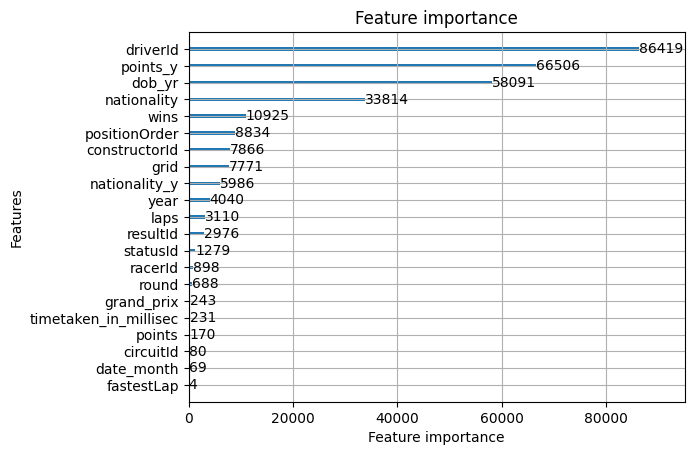

In [28]:
import matplotlib.pyplot as plt
lgb.plot_importance(mdl)
plt.show()

In [ ]:
# import lightgbm as lgb
# import numpy as np
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV

In [ ]:
# d_train = lgb.Dataset(X_train, label=Y_train)

# params = {
#     'boosting_type': 'gbdt',
#     'metric': 'mse'
# }

# param_grid = {
#     'learning_rate': [0.01, 0.05],
#     'n_estimators': [500, 1000],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5],
# }

# lgbm = lgb.LGBMRegressor(**params)
# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
# grid_search.fit(X_train, Y_train)

In [ ]:
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

In [ ]:
# params = {
#     'boosting_type': 'gbdt',
#     'metric': 'mse'
# }

# best_params = {'learning_rate': 0.01, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.1}

# mdl = lgb.LGBMRegressor(**params, **best_params)
# mdl.fit(X_train, Y_train)

In [ ]:
# pdc = mdl.predict(X_val.drop(columns=["result_driver_standing"]))
# rmse = np.sqrt(mean_squared_error(Y_val, pdc))
# print("score: {0:,.0f}".format(rmse))

### Outputting

In [29]:
import csv

predictions = mdl.predict(X_test.drop(columns=["result_driver_standing"]))

filename = "test_output_4.csv"
with open(filename, mode='w', newline="") as csv_file:
    fieldnames = ['position', 'result_driver_standing']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(predictions)):
        writer.writerow({'position': predictions[i], 'result_driver_standing': X_test["result_driver_standing"].iloc[i]})